In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks


import os
for dirname, _, filenames in os.walk('/kaggle/input/heart-failure-clinical-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


**Reading the data and pre-proccesing**

In [2]:
df=pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


**Data Format**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Features List**
* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction(**heart efficiency**)
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

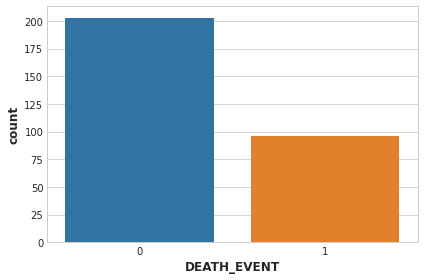

In [5]:
# Examining Class Balance
sns.countplot(x= df["DEATH_EVENT"])


<AxesSubplot:>

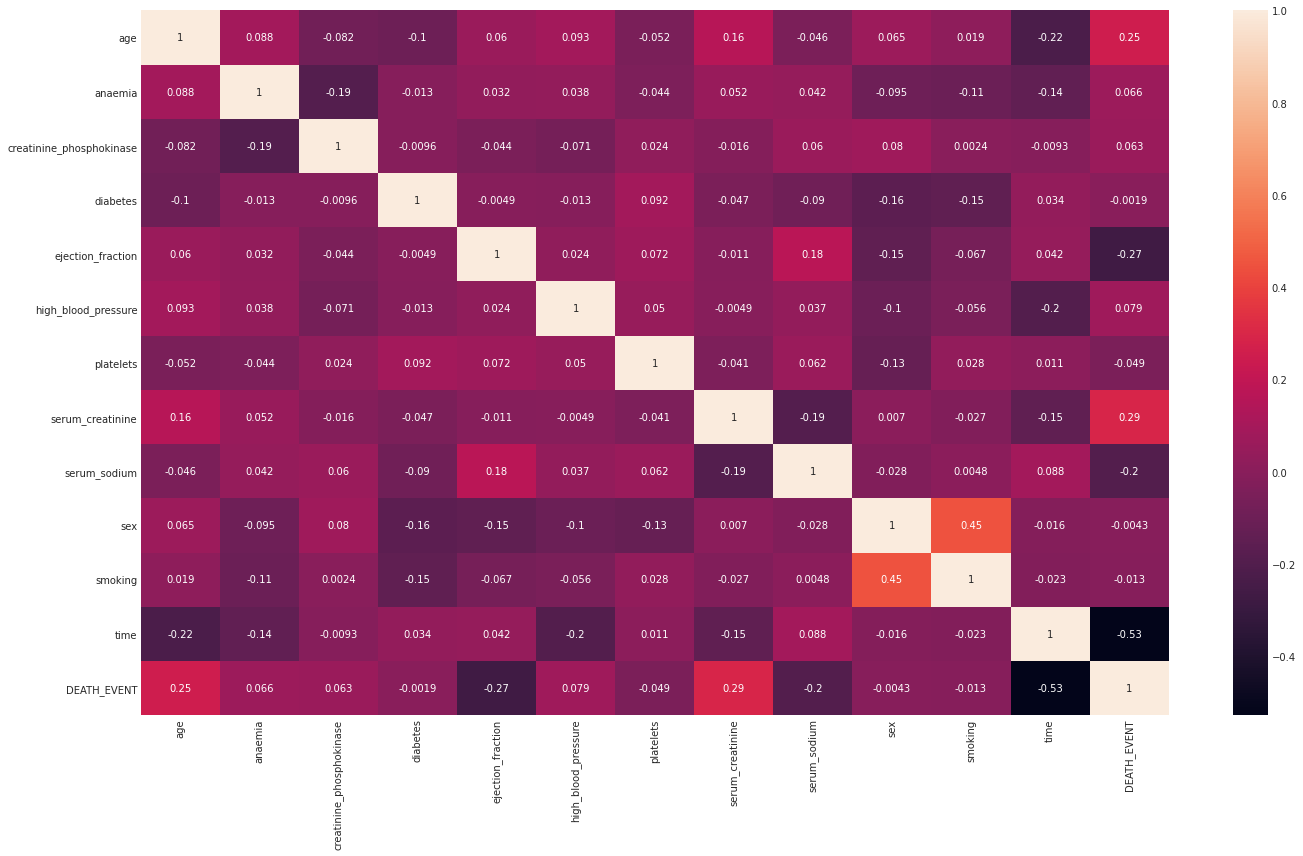

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(method='pearson'), annot=True)

**Setting up the train and validation sets**

In [7]:
#features = ['age', 'anemia','creatinine_phosphokinase','diabetes', 
#       'ejection_fraction','high_blood_pressure', 'platelets',
#               'serum_sodium','sex','smoking', 'time']

df_train=df.sample(frac=0.7, random_state=0)
df_valid =df.drop(df_train.index)

X_train = df_train.drop('DEATH_EVENT', axis=1)
X_valid = df_valid.drop('DEATH_EVENT', axis=1)

y_train = df_train['DEATH_EVENT']
y_valid = df_valid['DEATH_EVENT']

**Setting up the model**


In [8]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
     layers.Dense(8, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     layers.Dense(4, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])


**Choosing Optimizer ,Loss and Metric**

Epoch 1/200
11/11 [==============================] - 2s 73ms/step - loss: 0.9135 - binary_accuracy: 0.4981 - val_loss: 4.3788 - val_binary_accuracy: 0.6444
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 0.9164 - binary_accuracy: 0.4848 - val_loss: 3.3164 - val_binary_accuracy: 0.6444
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 0.9279 - binary_accuracy: 0.5329 - val_loss: 2.6581 - val_binary_accuracy: 0.6444
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.8418 - binary_accuracy: 0.5473 - val_loss: 2.1943 - val_binary_accuracy: 0.6444
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 0.8303 - binary_accuracy: 0.4908 - val_loss: 1.8334 - val_binary_accuracy: 0.6444
Epoch 6/200
11/11 [==============================] - 0s 9ms/step - loss: 0.8120 - binary_accuracy: 0.5578 - val_loss: 1.5600 - val_binary_accuracy: 0.6444
Epoch 7/200
11/11 [==============================] - 0s 9ms/step - lo

<AxesSubplot:title={'center':'Accuracy'}>

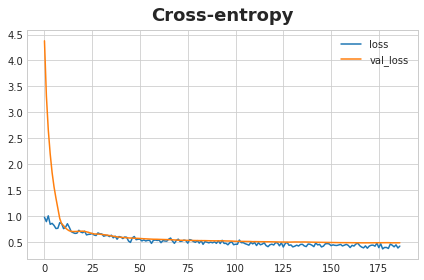

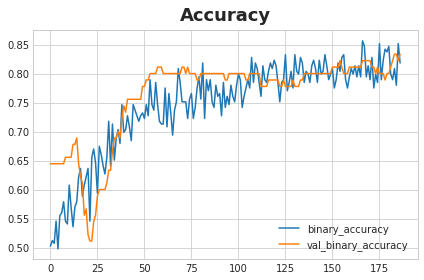

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=20,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [10]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}" +\
      "\nMean Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max(),
              history_df['val_binary_accuracy'].mean()))

Best Validation Loss: 0.4778
Best Validation Accuracy: 0.8333
Mean Validation Accuracy: 0.7614


In [11]:
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5)
np.set_printoptions()

**Confusion Matrix**

<AxesSubplot:>

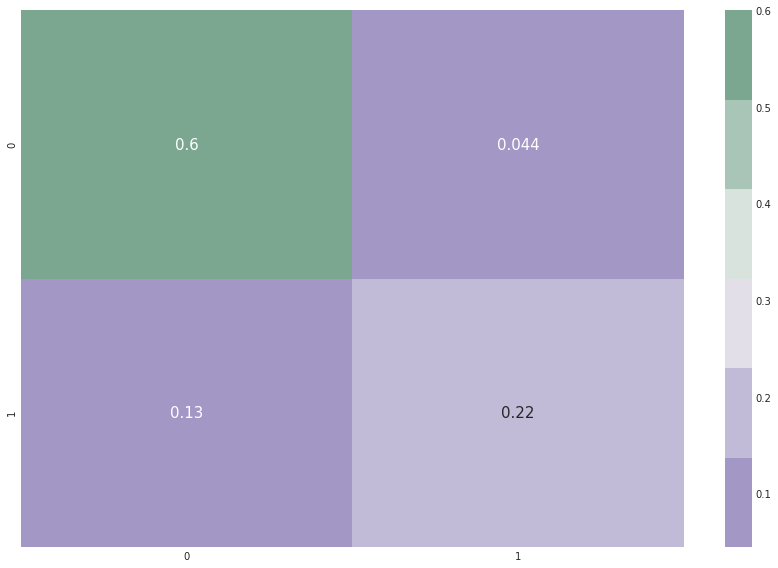

In [12]:

cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [13]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        58
           1       0.83      0.62      0.71        32

    accuracy                           0.82        90
   macro avg       0.83      0.78      0.79        90
weighted avg       0.82      0.82      0.82        90

